# **PARTIE I**

# Introduction

Cet article est la première partie des deux aricles qui sur lesquels on traite la regréssion linéaire avec une variable. la régression linéaire fait partie de la catégorie des techniques d'apprentissages supervisé.
Dans cet article, nous allons parler en premier lieu du dataset (le comprendre et l'explorer); en deuxieme lieu voir comment représenter notre modele; avant de voir la représentation et l'implémentation de la fonction d'erreur.

# 1 - Représentation du modèle et fonction d'erreur

Nous allons réaliser un modèle qui permet de prédire le profit d'un food-truck connaissant la nombre d'habitants de la ville ou il sera stationné. Pour se faire, nous disposons d'un dataset qui contient les profits de plusieurs food-truck stationnés sur plusieurs villes différents.

## 1.1 - Comprendre le dataset

le dataset a été téléchargé depuis Coursera. Il s'agit de d'un fichier csv (food-truck_profits.txt) qui contient deux champs qui portent sur les profits de différents food truck dans des villes. Chaque ligne représente un food truck dans une ville.
Les deux champs sont : 
- le premier champ représente le nombre d'habitant de la ville.
- le deuxième champ représente le profit (en dollars) d'un food truck sur cette ville.

Maintenant, allons recupérer ces deux champs et voir à quoi ils resembles

In [0]:
from google.colab import files
files.upload()

import numpy as np
tab = np.genfromtxt('food-truck_profits.txt', delimiter=',')

# recuperation des nombres d'habitants des villes
X = tab[:,0];

# recuperation des profits des food truck respectivement sur ces villes
Y = tab[:,1];

dataset = np.ones((np.size(X),2))
dataset[:,0] = X
dataset[:,1] = Y

# on affiche les 10 premiers food truck
print(dataset[0:9,:])

Saving food-truck_profits.txt to food-truck_profits.txt
[[ 6.1101 17.592 ]
 [ 5.5277  9.1302]
 [ 8.5186 13.662 ]
 [ 7.0032 11.854 ]
 [ 5.8598  6.8233]
 [ 8.3829 11.886 ]
 [ 7.4764  4.3483]
 [ 8.5781 12.    ]
 [ 6.4862  6.5987]]


On a recupérer les nombres d'habitants des villes X et les profits des food truck correspondant Y qu'on a mis sur un tableau à deux colonnes qui se nomme "dataset".
le prémière colonne représente les nombres d'habitants des villes et la deuxieme colonne représente les profits des food truc sur ces villes. On nomme m le nombre d'exemples (de food trucks) dans le dataset.
On obtient ainsi l'ensemble $$E_m = \{(x^{(1)},y^{(1)}),(x^{(2)},y^{(2)}),...,(x^{(m)},y^{(m)})\} $$

De ce faite $$ (x^{(i)}, y^{(i)}) $$ représente la i-ème ligne dela table "dataset" : la nombres d'habitant de la i-ème ville et le profits de la i-ème food truck dans cette ville.

si on visualise le dataset, on aura : 

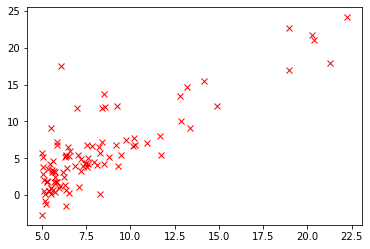

In [0]:
import matplotlib.pyplot as plt

plt.plot(dataset[:,0], dataset[:,1], 'rx')
plt.show()

## 1.2 - Représenter le modèle : 

### 1.2.1 -Représentation du modèle : 

Nous avons maintenant notre dataset qui represente les profits des food truck en sachant le nombre d'habitants de la ville les accueillant. Pour realiser le modele de regression linéaire, il ne faut trouver (apprendre) une fonction $$ h_\Theta : X \rightarrow Y $$

la fonction est appelé h (comme hypothese) par convention.
toujours par convention, on met theta pour faire référence aux paramètres de la fonction.

Comme on fait une regression linéaire, la fonction h sera linéaire et est représenté par $$ h_\Theta (x) = \Theta_0 + \Theta_1 x$$

Pour que notre modele soit pertinant, la condition suivante doit etre vrai : pour tout $$ (x^{(i)}, y^{(i)}) \in E_m $$ on a $$ h_\Theta (x^{(i)}) \approx y^{(i)} $$

Pour que la condition ci-dessus soit vrai, il nous faut trouvé des valeurs adéquat pour les paramettres (Theta_0 et Theta_1) de la fonction.

Maintenant, la question qu'on peut se poser est "comment trouver les bonnes valeurs pour les parametres Theta_0 et Theta_1 ?".
Nous allons y répondre dans la dernière partie de cette article mais avant ca, on va voir la fonction d'erreur.

### 1.2.2 - Implémentation vectorielle du modèle : 

Pour rendre notre fonction h plus performant en temps de calcule, on peut le vectoriser. Selon wikipedia, "La vectorisation est le processus de conversion d'un programme informatique à partir d'une implémentation scalaire, qui traite une seule paire d'opérandes à la fois, à une implémentation vectorielle qui traite une opération sur plusieurs paires d'opérandes à la fois."

Pour implémenter véctoriellement notre modèle, on doit définir la fonction h_theta de manière vectorielle.

Pour definir la fonction h_theta de maniere vectorielle : 
- On transforme d'abord les parametres theta en vecteur $$ \Theta =\binom{\Theta_0}{\Theta_1} $$

- Ensuite, on transforme x en vecteur $$ x =\binom{x_0}{x_1} \hspace{0.3cm} avec \hspace{0.3cm} x_0=1 \hspace{0.3cm} et \hspace{0.3cm} x_1=\hspace{0.1cm}nombre \hspace{0.2cm} d'habitants $$

la fonction h_theta devient $$ h_\Theta (x) = \Theta^T x $$

$$ avec \hspace{0.2cm}\Theta^T = vecteur \hspace{0.2cm}transposé \hspace{0.2cm} de \hspace{0.2cm} \Theta$$

Dans le reste de l'article et de la série, on implémentera toujours les modèles de manière vectorielle

$$ Pour \hspace{0.2cm} tous \hspace{0.2cm} les \hspace{0.2cm} x^{(i)} \in X \hspace{0.2cm} on \hspace{0.2cm} aura \hspace{0.2cm} x^{(i)} =\binom{x^{(i)}_0}{x^{(i)}_1} \hspace{0.2cm} avec \hspace{0.2cm} x^{(i)}_0=1 \hspace{0.2cm} et \hspace{0.2cm} x^{(i)}_1=x_1 $$

L'ensemble X des surfaces des maisons va devenir : $$ X = \begin{bmatrix}
1 & x^{(1)}_1\\ 
1 & x^{(2)}_1\\ 
 .&. \\ 
 .&. \\ 
 .&. \\ 
1 & x^{(n)}_1
\end{bmatrix} $$

on modifie la varable dataset afin d'ajouter une colonne (avec des 1) devant. ce qui va nous donner : 

In [0]:
datasetTemp = dataset

dataset = np.ones((np.size(X),3))
dataset[:,1] = datasetTemp[:,0]
dataset[:,2] = datasetTemp[:,1]

X = dataset[:,0:2]
Y = dataset[:,2]

print(X.shape)
print(X)
print(Y.shape)
print(Y)

(97, 2)
[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.     11.7   ]
 [ 1.      5.5416]
 [ 1.      7.5402]
 [ 1.      5.3077]
 [ 1

On peut ainsi implémenter la fonction python qui correspond à h_theta. Cette fonction prend en parametre deux vecteurs x (ou une matrice mx2) et theta et retourne la valeur de h_theta de x.

In [0]:
def h_theta(X, theta):
    ret = np.dot(theta, X.T)
    return ret


allons voir ce que donne la fonction h_theta sur des exemples : 

In [0]:
# pour theta = (0.5, 1)
theta = np.array([0.5, 1])

x = np.array([1, 6.1101])
print("pour theta = (0.5, 1), et x = (1, 6.1101) h_theta(x) vaut : ", h_theta(x,theta))

print("pour theta = (0.5, 1), et X est le dataset,  h_theta(x) vaut : ", h_theta(X,theta))


pour theta = (0.5, 1), et x = (1, 6.1101) h_theta(x) vaut :  6.6101
pour theta = (0.5, 1), et X est le dataset,  h_theta(x) vaut :  [ 6.6101  6.0277  9.0186  7.5032  6.3598  8.8829  7.9764  9.0781  6.9862
  5.5546  6.2107 14.664   6.234   8.9084  6.1407  5.8794  6.8654  5.6301
  6.9296  7.5708  6.6891 20.77    5.9901  6.8261  6.0649 19.445  13.328
 11.457  13.676  22.703   5.7524  7.0894  9.7482  6.3918  8.7111  8.4334
  8.5959  6.1063 13.336   6.8534  5.9069  7.3825 12.208   6.2737  8.3247
  7.5931  5.5702  6.3014 12.2     6.0416  8.0402  5.8077  7.9239  8.1031
  6.8328  6.8589  6.7742  6.1397  9.8102  9.9536  9.3254  5.6793 21.779
 15.408  19.459   7.7182  8.7951 10.736   5.9994 20.841  10.636   7.8345
  6.5062  7.7259  5.5269  7.0479  8.0386  5.5365 10.774   5.6077  6.2292
  5.6884  6.8557 10.2687  7.0159  9.0172  9.6802  6.502   6.0204  5.5594
  6.2077  8.1366  6.3707  5.8054  8.7934 13.894   5.9369]


On voit que pour le premier exemple (food truck), la nombre d'habitants de la ville est 6.1101 et le profit est 17.592.
Quand on se sert de notre modèle h_theta pour estimer le profit de ce food truck on trouve 6.6101, ce qui veut dire que notre modèle n'est pas encore au point.
Pour qu'il soit au point il faudra l'entrainer avec notre dataset.

## 1.3 - Fonction d'erreur : 

On a vu que notre modèle fait des erreurs dans l'estimation des profits des food truck. en prenant l'exemple du premier food truck de notre dataset qui est 17.592, notre modèle l'estime à 6.1101.

On peut definir l'erreur de notre modèle sur la première maison par : $$ (h_\Theta (x^{(1)}) - y^{(1)})^2 = (6.1101 - 17.592)^2 =131.83 $$

Ce qui est un grosse erreur car le profit estimé est trés loin du profit réel.

On peut ainsi définir la fonction d'erreur comme la moyene des erreurs de notre modèle sur le dataset E_m
Ce qui nous donne : $$ J(\Theta ) = \frac{1}{2m}\sum_{i=1}^{m}(h_\Theta (x^{(i)}) - y^{(i)})^2 $$

Cette fonction est aussi appelé erreur quadratique.

Par convension et pour faciliter le calcul du gradiant, on multiplie cette moyène par 1/2.

Lors de l'entrainement du modèle, c'est cette fonction J_theta qu'on va essayé de minimiser.
Ce qui revient à trouver un vecteur de paramèttre theta=(theta_0, theta_1) pour lequel J_theta serait le plus proche de 0.

On peut ainsi implémenter la fonction python qui correspond à la fonction d'erreur J de theta. Cette fonction prend en parametre un vecteur x (ou une matrice mx2), un vecteur theta et un vecteur Y (ou un scalaire y_i) et retourne la valeur de J de theta.

In [0]:
def computeErrorFunction(x, y, theta):
    h_theta_de_x = h_theta(x,theta)
    vec_temp =  (h_theta_de_x - y)**2
    ret = np.sum(vec_temp)/(2*(y.size))
    return ret

on peut calculer l'erreur : 

In [0]:
theta = np.array([0.5, 1])
print("pour theta = (0.5, 1), l'erreur est :", computeErrorFunction(X, Y, theta))

theta = np.array([12, 30])
print("pour theta = (500, 1000), l'erreur est :", computeErrorFunction(X, Y, theta))

pour theta = (0.5, 1), l'erreur est : 8.731188017156702
pour theta = (500, 1000), l'erreur est : 37643.43989082003


On voit que l'erreur est plus petite avec theta = (0.5, 1) qu'avec theta = (500, 1000), donc notre modèle est plus performant avec le parametre theta = (0.5, 1).

# Conclusion

Aprés avoir définit la fonction d'erreur, explorer le dataset et donner une représentation de notre modèle. on peut dire que notre modele n'est pas encore performant car n'ayant pas les bonnes paramètres. Pour retrouver les bonnes paramètres, il faudra entrainer le modèle. D'ou l'objet de la deuxième partie de cette article qui va porter sur l'entrainement d'un modèle.

# **PARTIE II**

# Introduction

Cet article est la deuxième partie des deux aricles qui sur lesquels on traite la regréssion linéaire avec une variable. Dans la première partie, on a pu représenter notre et definit la fonction d'erreur; dans cette seconde partie, nous allons entrainer notre modèle en utilisant la descente de gradient.
Pour se faire, nous allons voir en premier lieu ce qu'est la descente de gradient avant de l'appliquer, dans un deuxième temps, à notre modèle pour l'entrainer.

# 2 - Entrainement du Modèle : 

L'entrainement du modèle consiste à trouver le vecteur paramètre theta = (theta_0, theta_1) pour lequel la fonction d'erreur J(theta) est le plus proche de 0. Pour se faire, on doit minimiser la fonction J(theta) : $$ \underset{\Theta_{0}, \Theta_{1}}{min}J(\Theta) $$.

On minimise J(theta) en faisant une descente de gradient.

## 2.1 - la descente de gradient : 

La descente de gradient est un algorithme qui permet de trouver le minimum d'une focntion.

Si on veut trouver le minimum d'une fonction f(x) par exemple $$ \underset{x}{min}f(x) $$, calculer f(x) pour toutes les valeur possibles de x serait trés couteux en ressources informatique et en temps de calcul. Il existe un meilleur outils (largement utilisé en machine learning) qui s'appele la descente de gradient.

1- La première etape de la descente de gradient est de choisir au hasard une valeur x_0 de départ pour x.
2- Ensuite, on calcule le gradient de la fonction f au point x_0 (qui est f'(x_0)). En effet, le gradient est un vecteur qui indique toujours la direction de la croissance maximale de la fonction. Le schéma suivant va illustrer ca :

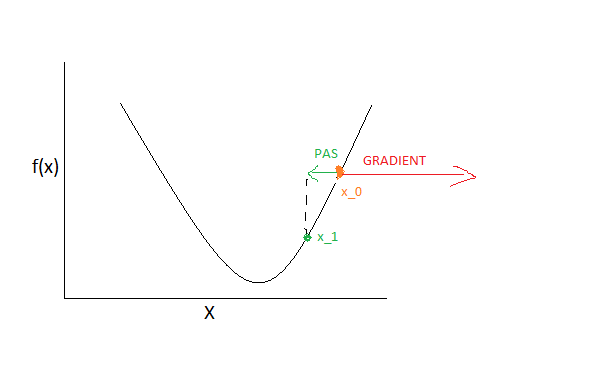

In [0]:
from IPython.display import Image
Image('/content/desc-grad-1.png')

3- Comme le gradient indique la direction de la valeur maximale de la fonction, donc pour avoire une nouvelle valeur de x qui nous permette de nous rapprocher de la valeur minimale de la fonction f(x) on fait un pas vers la direction inverse du gradient. ce qui nous donne une nouvelle valeur x_1 = x_0 - alpha*f'(x_0).

4- on repéte les etapes 1, 2, et 3 avec la nouvelle valeur de x_1 de x.
5- En iterant plusieurs fois sur ce procédé, on va arriver à une valeur x_n tel que $$ f(x_{n}) \approx 0 $$

Et la, on dit qu'on a atteint notre point de convergence.

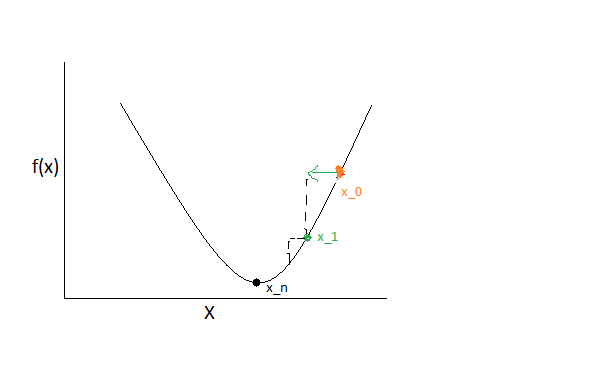

In [0]:
Image('/content/desc-grad-2.png')

alpha est un paramètre de l'algorithme de descente de gradient. On l'appelle le pas d'apprentissage (learning rate en anglais).
la valeur de alpha doit etre fixé avant le debut de la descente de grandient. Il ne doit ni trop petit ni trop grand.

## 2.2 - Application de la descente de gradient à notre modèle de regression linéaire : 

L'entrainement du modèle consiste à minimiser la fonction d'erreur : $$ \underset{\Theta_{0}, \Theta_{1}}{min}J(\Theta) $$.

Pour se faire, nous allons appliquer le descente de gradient sur la fonction J(theta).
Dans le cas de notre fonction J(theta), on a deux inconnues theta_0 et theta_1. au lieu de calculer J'(theta), on calcule les dérivés partiels $$ \frac{\partial}{\partial \Theta_0}J(\Theta) \hspace{0.2cm} et \hspace{0.2cm} \frac{\partial}{\partial \Theta_1}J(\Theta)$$

qui sont  : $$ \frac{\partial}{\partial \Theta_0}J(\Theta) = \frac{1}{m}\sum_{i=1}^{m}\left ( h_\Theta (x^{(i)}) - y^{(i)} \right ) $$

$$ \frac{\partial}{\partial \Theta_1}J(\Theta) = \frac{1}{m}\sum_{i=1}^{m}(\left ( h_\Theta (x^{(i)}) - y^{(i)} \right )x^{(i)}_1) $$

Dabord, on choisi des valeurs initiaux (au hasarrd) pour theta_0 et theta_1

Ensuite, on fait des itérations : 

on a : repeter { $$ \Theta_0 := \Theta_0 - \alpha \frac{1}{m}\sum_{i=1}^{m}\left ( h_\Theta (x^{(i)}) - y^{(i)} \right ) $$

$$ \Theta_1 := \Theta_1 - \alpha \frac{1}{m}\sum_{i=1}^{m}(\left ( h_\Theta (x^{(i)}) - y^{(i)} \right )x^{(i)}_1) $$

}

En machine learning, chaque itération est appelé epoque. le nombre d'époque est un paramèttre de l'apprentissage.

Pour implémenter véctoriellement l'entrainement de notre modèle, On transforme les parametres theta et les gradients (dérivés partielles) en vecteur $$ \Theta =\binom{\Theta_0}{\Theta_1} \hspace{0.2cm} et \hspace{0.2cm} \triangledown J(\Theta ) = \binom{\frac{\partial}{\partial \Theta_0}J(\Theta)}{\frac{\partial}{\partial \Theta_1}J(\Theta)}$$

Notre itération devient :  repeter { $$ \Theta := \Theta - \alpha \hspace{0.1cm} \triangledown J(\Theta ) $$

}

On peut ainsi implémenter la fonction python qui calcule les gradients. Cette fonction prend en parametre un vecteur une matrice mx2, un vecteur theta et un vecteur Y et retourne le vercteur de gradient $$ \triangledown J(\Theta ) $$.

In [0]:
def computeGradient(x, y, theta):
    h_theta_de_x = h_theta(x,theta)
    vec_temp =  (h_theta_de_x - y)
    ret = np.dot(x.T,vec_temp)/y.size
    return ret

on peut calculer le vecteur des gradients pour voir ce que ca donne : 

In [0]:
theta = np.array([0.5, 1])
print("pour theta = (0.5, 1), le vecteur des gradients est :", computeGradient(X, Y, theta))

pour theta = (0.5, 1), le vecteur des gradients est : [ 2.82066495 20.15499308]


On peut aussi implémenter la fonction python qui entraine notre modèle. Cette fonction prend en parametre un vecteur une matrice mx2, un vecteur Y, le nombre d'epoques, et le learning rate (alpha) et retourne le vercteur de theta pour lequel notre fonction d'erreur sera minimum.

In [0]:
np.seterr(all='warn')
np.set_printoptions(suppress=True)
def trainModel(x, y, nb_epoch, alpha=0.01):
    # on choisi des valeurs arbitraires pour le vecteur theta
    theta = np.array([0.5, 1])
    # on itere sur le nombre d'epoques
    for i in range(nb_epoch):
        grad = computeGradient(x, y, theta)
        theta = theta - alpha*grad
        if i == 15 : 
            print("theta ", theta)
            print("gradient :", grad)
            print("h_theta : ",h_theta(x,theta))
            
        print("Epoque ", i)
        print("l'erreur est : ", "%.5f"%computeErrorFunction(x, y, theta))
    
    return theta

Entrainons notre modèle sur 1500 epoques par exemple. ce qui nous donne : 

In [0]:
theta_train = trainModel(X, Y, 1500, 0.01)

Epoque  0
l'erreur est :  6.28959
Epoque  1
l'erreur est :  6.20639
Epoque  2
l'erreur est :  6.19774
Epoque  3
l'erreur est :  6.19146
Epoque  4
l'erreur est :  6.18528
Epoque  5
l'erreur est :  6.17913
Epoque  6
l'erreur est :  6.17300
Epoque  7
l'erreur est :  6.16689
Epoque  8
l'erreur est :  6.16080
Epoque  9
l'erreur est :  6.15474
Epoque  10
l'erreur est :  6.14869
Epoque  11
l'erreur est :  6.14267
Epoque  12
l'erreur est :  6.13667
Epoque  13
l'erreur est :  6.13070
Epoque  14
l'erreur est :  6.12474
theta  [0.35090001 0.76640849]
gradient : [ 0.76688731 -0.07704215]
h_theta :  [ 5.0337325   4.5873762   6.87962734  5.71821192  4.84190046  6.77562571
  6.08087641  6.92522864  5.32197873  4.22478834  4.72762895 11.20630981
  4.74548627  6.79516912  4.67398036  4.47371782  5.22939659  4.28265218
  5.27860001  5.77002113  5.09427877 15.88600002  4.55855924  5.19927673
  4.61588659 14.87050878 10.18238807  8.74843779 10.44909822 17.36746762
  4.37638394  5.40107209  7.43879897  4.8

on a trouvé le vecteur theta suivant : 

In [0]:
print(theta_train)

[-3.60387633  1.16370867]


pour calculer le profit d'un nouveau food truck sur une ville de 1000 habitants, on fera :

In [0]:
x = np.array([1, 1000])
profit = h_theta(x,theta_train)
print("Pour une ville de 1000 habitants, le profit est estimé à : ","%.2f"%profit,"$")

Pour une ville de 1000 habitants, le profit est estimé à :  1160.10 $


# Conclusion

Aprés avoir expliquer en detail l'algorithme de descente de gradient, nous l'avons appliquer à notre modèle ce qui nous a permit de trouver les meilleurs paramèttres theta pour celui-ci. cependant, il existe un autre moyen pour trouver les meillieures paramètres theta: c'est l'equation normale. Nous allons en parler dans les articles à venir.
L'article suivant portera sur le regression linéaire avec plusieurs variables.

# Annexe : 

### passage de l'implementation scalaire à l'implementation vectorielle

on peut demontrer $$ h_\Theta (x) = \Theta_0 + \Theta_1 x = \Theta_0 * 1 + \Theta_1 * x $$

$$ comme \hspace{0.2cm} x_0 = 1 \hspace{0.2cm} et \hspace{0.2cm} x_1 = x, \hspace{0.3cm} on \hspace{0.3cm} peut \hspace{0.3cm} ecrire \hspace{0.3cm} h_\Theta (x) = \Theta_0 * x_0 + \Theta_1 * x_1 $$

$$ce \hspace{0.2cm} qui \hspace{0.2cm} nous \hspace{0.2cm} donne \hspace{0.2cm} h_\Theta (x) = \bigl(\begin{smallmatrix}
 \Theta_0& \Theta_1
\end{smallmatrix}\bigr) * \binom{x_0}{x_1} = \Theta^Tx $$


$$ h_\Theta (x) = \Theta^T x $$